# Python 第3次作业

## 1. 载入分析所需要的库和模块

In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

---

## 2. 数据读取及观察

使用 pandas 库中的 read_csv 函数读取 CSV 文件

In [209]:
data = pd.read_csv('../data/数据5.2.csv')

`data.info()` 是 Pandas 库中 DataFrame 对象的一个方法，用于打印 DataFrame 的简明摘要信息。该方法会输出以下内容：
1. 数据的基本信息，包含索引范围和数据的总行数。
2. 每列的信息，包括列名、非空值数量、数据类型。
3. 内存使用情况，即该 DataFrame 占用的内存大小。

In [210]:
# 查看数据集的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      700 non-null    int64  
 1   V2      700 non-null    float64
 2   V3      700 non-null    int64  
 3   V4      700 non-null    int64  
 4   V5      700 non-null    float64
 5   V6      700 non-null    int64  
 6   V7      700 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 38.4 KB


对数据集的基本信息分析如下：
- **数据量**：共有 700 条记录（从索引 0 到 699）。
- **列数**：共有 7 列，分别是 `V1`, `V2`, `V3`, `V4`, `V5`, `V6`, `V7`。
- **数据类型**：
    - `float64` 类型：2 列（`V2` 和 `V5`）。
    - `int64` 类型：5 列（`V1`, `V3`, `V4`, `V6`, `V7`）。
- **内存占用**：约 38.4 KB。

所有列均为非空（Non-Null Count 均为 700），说明数据没有缺失值。

In [211]:
# 查看有哪些列
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7'], dtype='object')

In [212]:
# 查看数据形状
data.shape

(700, 7)

In [213]:
# 查看数据类型
data.dtypes

V1      int64
V2    float64
V3      int64
V4      int64
V5    float64
V6      int64
V7      int64
dtype: object

In [214]:
# 查看是否有缺失值
data.isnull().values.any() 

False

In [215]:
# 查看缺失值数量
data.isnull().sum() 

V1    0
V2    0
V3    0
V4    0
V5    0
V6    0
V7    0
dtype: int64

In [216]:
# 查看前五行数据
data.head()

,V1,V2,V3,V4,V5,V6,V7
0,0,20.33,3,1,20.66,0,0
1,0,36.59,1,1,8.67,0,1
2,0,34.96,2,1,19.67,1,0
3,0,26.83,1,2,21.54,1,1
4,0,21.14,4,1,16.92,0,1


---

## 3. 描述性分析

### 3.1 计算统计各变量的统计指标

针对数据集中各变量计算平均值、标准差、最大值、最小值、四分位数等统计指标，针对连续变量的结果进行解读；  

In [217]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.describe()

,V1,V2,V3,V4,V5,V6,V7
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,0.261429,28.341543,2.041429,1.501429,12.586629,0.535714,0.445714
std,0.439727,6.501841,0.947702,1.173746,7.509957,0.499079,0.497400
min,0.000000,16.260000,1.000000,1.000000,1.740000,0.000000,0.000000
25%,0.000000,23.580000,1.000000,1.000000,6.800000,0.000000,0.000000
50%,0.000000,27.640000,2.000000,1.000000,10.760000,1.000000,0.000000
75%,1.000000,32.520000,2.000000,1.000000,16.837500,1.000000,1.000000
max,1.000000,45.530000,5.000000,5.000000,46.730000,1.000000,1.000000


数据集中的连续变量为V2和V5，对其分析如下：

1. V2：数值较大，取值范围广，数据在均值周围有一定波动，分布较为连续且逐步递增。
2. V5：取值范围非常大，数据离散程度很高，分布较为分散。


### 3.2 按照V1变量的取值分组对其他变量开展描述性分析

针对连续变量，通常使用计算平均值、标准差、最大值、最小值、四分位数等统计指标的方式来进行描述性分析；针对分类变量，通常使用交叉表的方式开展分析。

In [218]:
# 按照 V1 变量的取值分组对其他变量开展描述性分析
grouped = data.groupby('V1')
data.groupby('V1').describe().unstack()

           V1
V2  count  0     517.000000
           1     183.000000
    mean   0      28.873694
           1      26.838142
    std    0       6.266412
           1       6.924717
    min    0      16.260000
           1      16.260000
    25%    0      23.580000
           1      21.950000
    50%    0      28.460000
           1      25.200000
    75%    0      33.330000
           1      31.710000
    max    0      45.530000
           1      44.720000
V3  count  0     517.000000
           1     183.000000
    mean   0       2.021277
           1       2.098361
    std    0       0.909432
           1       1.048886
    min    0       1.000000
           1       1.000000
    25%    0       1.000000
           1       1.000000
    50%    0       2.000000
           1       2.000000
    75%    0       2.000000
           1       2.000000
    max    0       5.000000
           1       5.000000
V4  count  0     517.000000
           1     183.000000
    mean   0       1.460348
      

从 `count` 行数据可知，两组数据的样本量不同，0 组样本量为 517，1 组样本量为 183。

| 变量 | 分析维度 | V1=0 的数据 | V1=1 的数据 | 分析结论 |
| --- | --- | --- | --- | --- |
| V2 | 均值 | 28.873694 | 26.838142 | 0 组均值略高于 1 组 |
| V2 | 标准差 | 6.266412 | 6.924717 | 1 组数据相对更分散 |
| V2 | 最值 | 最小值：16.260000，最大值略高 | 最小值：16.260000，最大值略低 | 两组最小值相同，0 组最大值略高于 1 组 |
| V3 | 均值 | 2.021277 | 2.098361 | 两组均值都接近 2 |
| V3 | 分布 | 大部分集中在 1 - 2 之间 | 大部分集中在 1 - 2 之间 | 从 25% - 75% 分位数来看，两组数据分布较为集中 |
| V4 | 分布集中 | 大部分分位数（25% - 75%）的值为 1 | 大部分分位数（25% - 75%）的值为 1 | 数据集中在 1 附近 |
| V4 | 均值 | 低于 1 组 | 略高于 0 组 | 1 组均值略高于 0 组 |
| V5 | 均值差异 | 10.847234 | 17.500656 | 1 组均值明显高于 0 组 |
| V5 | 离散程度 | 6.176717 | 8.693078 | 1 组数据更分散 |
| V6 和 V7 | 二值特征 | 取值范围 0 - 1 | 取值范围 0 - 1 | 推测可能是二值特征 |
| V6 和 V7 | 分布 | 分位数有较多重合，标准差接近 0.5 | 分位数有较多重合，标准差接近 0.5 | 数据在 0 和 1 上分布较为均衡 |

### 3.3 对V1和V3变量进行交叉表分析

交叉表分析是描述统计的一种，分析特色是将数据按照行变量、列变量进行描述统计。在 Pandas 里，`pd.crosstab` 函数可用于创建交叉表，用于展示两个或多个分类变量之间的频数分布。

In [219]:
# 使用交叉表分析 “V1是否购买本次推广产品” 和 “V3年收入水平”
pd.crosstab(data.V3, data.V1)

V1,0,1
V3,,
1,139,59
2,293,79
3,24,14
4,57,30
5,4,1


样本客户主要集中在V3 级别 1 和 级别 2，表明推广活动主要触达的是这两个收入区间的群体。
1. 级别 2 的人数最多（372 人，占总数的 ≈53.1%）。
2. 级别 1 其次（198 人，占总数的 ≈28.3%）。
3. 级别 5 的样本量极小（仅 5 人）。

为了衡量收入水平对购买决策的影响，可以计算每个收入级别的购买率（即已购买人数占该级别总人数的比例）。

| V3 (收入级别) | 总人数 | 购买人数 (V1=1) | 购买率 (转化率) |
| --- | --- | --- | --- |
| 1 | 198 | 59 | 59/198≈29.8% |
| 2 | 372 | 79 | 79/372≈21.2% |
| 3 | 38 | 14 | 14/38≈36.8% |
| 4 | 87 | 30 | 30/87≈34.5% |
| 5 | 5 | 1 | 1/5=20.0% |

In [220]:
# 查看“V3年收入水平”和“V1是否购买本次推广产品”的交叉表， normalize='index' 表示按行归一化
pd.crosstab(data.V3, data.V1, normalize='index')

V1,0,1
V3,,
1,0.702020,0.297980
2,0.787634,0.212366
3,0.631579,0.368421
4,0.655172,0.344828
5,0.800000,0.200000


---

## 4. 数据处理



区分分类特征和连续特征并进行处理，对分类特征设置虚拟变量，对连续特征进行标准化处理；  

In [221]:
def data_encoding(data):
    # 选取指定列的数据
    data = data[["V1", "V2", "V3", "V4", "V5", "V6", "V7"]]

    # 定义离散特征和连续特征
    discrete_feature = ["V3"]
    continuous_feature = ["V2", "V5", "V4", "V6", "V7"]

    # 对离散特征进行独热编码
    df = pd.get_dummies(data, columns=discrete_feature)
    
    # 对连续特征进行标准化处理
    df[continuous_feature] = (df[continuous_feature] - df[continuous_feature].mean()) / df[continuous_feature].std()
    
    # 将 V1 列添加回处理后的数据框
    df["V1"] = data[["V1"]]

    return df

data = data_encoding(data)
data

,V1,V2,V4,V5,V6,V7,V3_1,V3_2,V3_3,V3_4,V3_5
0,0,-1.232196,-0.427204,1.075022,-1.073405,-0.896089,False,False,True,False,False
1,0,1.268634,-0.427204,-0.521525,-1.073405,1.114367,True,False,False,False,False
2,0,1.017936,-0.427204,0.943197,0.930284,-0.896089,False,True,False,False,False
3,0,-0.232479,0.424769,1.192200,0.930284,1.114367,True,False,False,False,False
4,0,-1.107616,-0.427204,0.577017,-1.073405,1.114367,False,False,False,True,False
5,0,1.268634,-0.427204,-1.195297,0.930284,-0.896089,False,True,False,False,False
6,0,-0.607758,-0.427204,0.035070,0.930284,-0.896089,False,True,False,False,False
7,0,-0.983036,-0.427204,-0.624055,0.930284,1.114367,False,False,False,True,False
8,0,-1.232196,0.424769,0.606311,0.930284,-0.896089,False,True,False,False,False
9,0,-1.232196,-0.427204,-1.078119,0.930284,-0.896089,False,True,False,False,False


将样本示例全集分割为训练样本和测试样本，测试样本占比为30%，设定随机数种子为123，以保证随机抽样的结果可重复。

In [222]:
# 设置特征变量，即除V1之外的全部变量
X = data.drop(['V1', 'V3_5'], axis=1)
X['intercept'] = [1]*X.shape[0]
y = data['V1']
print(data["V1"].value_counts())

V1
0    517
1    183
Name: count, dtype: int64


In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)
X_train.head()

,V2,V4,V5,V6,V7,V3_1,V3_2,V3_3,V3_4,intercept
404,-0.483177,-0.427204,1.880619,-1.073405,1.114367,True,False,False,False,1
63,-0.357059,-0.427204,-1.078119,-1.073405,1.114367,False,True,False,False,1
34,1.893073,-0.427204,0.284072,-1.073405,-0.896089,False,False,False,True,1
33,0.642658,-0.427204,-1.136708,0.930284,1.114367,False,False,False,True,1
583,1.142516,-0.427204,-1.136708,-1.073405,1.114367,True,False,False,False,1


In [224]:
# 1. 确定需要转换的布尔列
bool_cols = ['V3_1', 'V3_2', 'V3_3', 'V3_4']

# 2. 将这些列从布尔型转换为整数型 (True -> 1, False -> 0)
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

In [225]:
y_train.head()

404    1
63     0
34     0
33     0
583    0
Name: V1, dtype: int64

---

## 5. 使用statsmodels建立二元Logistic回归算法模型

### 5.1 使用statsmodels建立二元Logistic回归算法模型

`statsmodels` 是一个Python库，它提供了许多用于统计建模、统计测试以及数据探索的工具。该库专注于为用户提供经典的统计方法，包括线性回归、广义线性模型、时间序列分析等。

In [226]:
model = sm.Logit(y_train, X_train)
results = model.fit()
results.params

Optimization terminated successfully.
         Current function value: 0.478264
         Iterations 6


V2          -0.364992
V4           0.026051
V5           0.999300
V6          -0.187733
V7           0.059041
V3_1        -0.521205
V3_2        -0.832842
V3_3         0.103559
V3_4         0.097942
intercept   -0.644774
dtype: float64

In [227]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     V1   No. Observations:                  490
Model:                          Logit   Df Residuals:                      480
Method:                           MLE   Df Model:                            9
Date:                Sat, 27 Sep 2025   Pseudo R-squ.:                  0.1792
Time:                        10:43:33   Log-Likelihood:                -234.35
converged:                       True   LL-Null:                       -285.50
Covariance Type:            nonrobust   LLR p-value:                 5.394e-18
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V2            -0.3650      0.116     -3.139      0.002      -0.593      -0.137
V4             0.0261      0.110      0.238      0.812      -0.189       0.241
V5             0.9993      0.122      8.167      0.000       0.759       1.239
V6            -0.1877      0.116     -1.616      0.106      -0.415       0.040
V7             0.0590      0.116      0.511      0.610      -0.168       0.286
V3_1          -0.5212      1.168     -0.446      0.656      -2.811       1.769
V3_2          -0.8328      1.161     -0.717      0.473      -3.109       1.443
V3_3           0.1036      1.236      0.084      0.933      -2.319       2.526
V3_4           0.0979      1.187      0.082      0.934      -2.229       2.425
intercept     -0.6448      1.145     -0.563      0.573      -2.889       1.600
==============================================================================
"""

In [228]:
# 以几率比（Odds ratio）的形式输出二元Logistic回归模型的系数值
np.exp(results.params)

V2           0.694203
V4           1.026393
V5           2.716381
V6           0.828836
V7           1.060819
V3_1         0.593805
V3_2         0.434812
V3_3         1.109111
V3_4         1.102899
intercept    0.524781
dtype: float64

| 变量 | 几率比 (OR) | 几率变化 | 解释 (购买倾向) |
|------|-------------|----------|------------------|
| V5   | 2.716       | 增加 171.6% | 最强正向影响。V5 每增加 1 单位，客户购买的几率增加约 172%。 |
| V2   | 0.694       | 减少 30.6% | 显著负向影响。V2 每增加 1 单位，客户购买的几率减少约 31%。 |
| V7   | 1.061       | 增加 6.1% | 微弱的正向影响。 |
| V4   | 1.026       | 增加 2.6% | 几乎无影响。 |
| V6   | 0.829       | 减少 17.1% | 较弱的负向影响。 |


In [229]:
margeff = results.get_margeff()
margeff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                     V1
Method:                          dydx
At:                           overall
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V2            -0.0565      0.017     -3.235      0.001      -0.091      -0.022
V4             0.0040      0.017      0.238      0.812      -0.029       0.037
V5             0.1546      0.014     10.901      0.000       0.127       0.182
V6            -0.0290      0.018     -1.629      0.103      -0.064       0.006
V7             0.0091      0.018      0.511      0.609      -0.026       0.044
V3_1          -0.0806      0.181     -0.446      0.655      -0.435       0.274
V3_2          -0.1289      0.179     -0.718      0.473      -0.481       0.223
V3_3           0.0160      0.191      0.084      0.933      -0.359       0.391
V3_4           0.0152      0.184      0.083      0.934      -0.345       0.375
==============================================================================
"""

### 5.1 计算训练误差

In [230]:
table = results.pred_table() 
table

array([[334.,  24.],
       [ 86.,  46.]])

In [231]:
# 计算模型的准确率
Accuracy = (table[0, 0] + table[1, 1]) / np.sum(table)
Accuracy

0.7755102040816326

In [232]:
# 计算模型的错误率
Error_rate = 1 - Accuracy
Error_rate

0.22448979591836737

In [233]:
# 计算模型的精确率
precision = table[1, 1] / (table[0, 1] + table[1, 1])
precision

0.6571428571428571

In [234]:
# 计算模型的召回率
recall = table[1, 1] / (table[1, 0] + table[1, 1])
recall

0.3484848484848485

### 5.3 计算测试误差

In [235]:
prob = results.predict(X_test)
pred = (prob >= 0.5)
table = pd.crosstab(y_test, pred, colnames=['Predicted'])
table

Predicted,False,True
V1,,
0,144,15
1,34,17


In [236]:
table = np.array(table)   

Accuracy = (table[0, 0] + table[1, 1]) / np.sum(table)
Accuracy

0.7666666666666667

In [237]:
Error_rate = 1 - Accuracy
Error_rate

0.23333333333333328

In [238]:
precision = table[1, 1] / (table[0, 1] + table[1, 1])
precision

0.53125

In [239]:
recall = table[1, 1] / (table[1, 0] + table[1, 1])
recall

0.3333333333333333

---

## 6 使用sklearn建立二元Logistic回归算法模型

In [240]:
model =  LogisticRegression(C=1e10, fit_intercept=True)
model.fit(X_train, y_train)
print("训练样本预测准确率: {:.3f}".format(model.score(X_train, y_train)))
print("测试样本预测准确率: {:.3f}".format(model.score(X_test, y_test)))

训练样本预测准确率: 0.778
测试样本预测准确率: 0.767


In [241]:
model.coef_

array([[-0.36499569,  0.02606894,  0.99933449, -0.18780027,  0.05900235,
        -0.52126282, -0.83295411,  0.10357227,  0.09778604, -0.32232961]])

In [242]:
predict_target = model.predict(X_test)
predict_target

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [243]:
predict_target_prob = model.predict_proba(X_test)  
predict_target_prob

array([[0.51763559, 0.48236441],
       [0.51629213, 0.48370787],
       [0.91085971, 0.08914029],
       [0.80692919, 0.19307081],
       [0.46592783, 0.53407217],
       [0.63140839, 0.36859161],
       [0.13433822, 0.86566178],
       [0.88889992, 0.11110008],
       [0.82062785, 0.17937215],
       [0.76965345, 0.23034655],
       [0.28261318, 0.71738682],
       [0.35834838, 0.64165162],
       [0.86334216, 0.13665784],
       [0.83607065, 0.16392935],
       [0.8698404 , 0.1301596 ],
       [0.49355146, 0.50644854],
       [0.91191593, 0.08808407],
       [0.62518094, 0.37481906],
       [0.77131462, 0.22868538],
       [0.8886198 , 0.1113802 ],
       [0.89276882, 0.10723118],
       [0.7414543 , 0.2585457 ],
       [0.8080439 , 0.1919561 ],
       [0.48794502, 0.51205498],
       [0.90765422, 0.09234578],
       [0.8010581 , 0.1989419 ],
       [0.82582916, 0.17417084],
       [0.679377  , 0.320623  ],
       [0.82005153, 0.17994847],
       [0.88156376, 0.11843624],
       [0.

In [244]:
predict_target_prob_lr = predict_target_prob[:, 1]
df = pd.DataFrame({'prob': predict_target_prob_lr, 'target': predict_target, 'labels': list(y_test)})
df.head()

,prob,target,labels
0,0.482364,0,0
1,0.483708,0,0
2,0.089140,0,0
3,0.193071,0,0
4,0.534072,1,0


In [245]:
print('预测正确总数：')
print(sum(predict_target==y_test))

预测正确总数：
161


In [246]:
print('训练样本：')
predict_Target = model.predict(X_train)
print(metrics.classification_report(y_train, predict_Target))
print(metrics.confusion_matrix(y_train, predict_Target))

训练样本：
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       358
           1       0.66      0.36      0.46       132

    accuracy                           0.78       490
   macro avg       0.73      0.64      0.66       490
weighted avg       0.76      0.78      0.75       490

[[334  24]
 [ 85  47]]


In [247]:
print('测试样本：')
print(metrics.classification_report(y_test, predict_target))
print(metrics.confusion_matrix(y_test, predict_target))

测试样本：
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       159
           1       0.53      0.33      0.41        51

    accuracy                           0.77       210
   macro avg       0.67      0.62      0.63       210
weighted avg       0.74      0.77      0.75       210

[[144  15]
 [ 34  17]]


---

## 7 特征变量重要性水平分析

In [248]:
lr1 = [i for item in model.coef_ for i in item]
lr1 = np.array(lr1)
lr1

array([-0.36499569,  0.02606894,  0.99933449, -0.18780027,  0.05900235,
       -0.52126282, -0.83295411,  0.10357227,  0.09778604, -0.32232961])

In [249]:
feature = list(X.columns)
feature

['V2', 'V4', 'V5', 'V6', 'V7', 'V3_1', 'V3_2', 'V3_3', 'V3_4', 'intercept']

In [250]:
dic={}
for i in range(len(feature)):
  dic.update({feature[i]: lr1[i]})
dic

{'V2': -0.36499568695644263,
 'V4': 0.026068941454863492,
 'V5': 0.9993344932608373,
 'V6': -0.18780026510906955,
 'V7': 0.05900234918715404,
 'V3_1': -0.5212628192766355,
 'V3_2': -0.8329541134834083,
 'V3_3': 0.10357227463321901,
 'V3_4': 0.09778604005038755,
 'intercept': -0.32232961040511104}

In [251]:
df = df.reset_index().rename(columns={'index':'特征'})
df

,特征,prob,target,labels
0,0,0.482364,0,0
1,1,0.483708,0,0
2,2,0.089140,0,0
3,3,0.193071,0,0
4,4,0.534072,1,0
5,5,0.368592,0,0
6,6,0.865662,1,0
7,7,0.111100,0,0
8,8,0.179372,0,0
9,9,0.230347,0,0


In [253]:
df = pd.DataFrame.from_dict(dic, orient='index', columns=['权重'])
df

,权重
V2,-0.364996
V4,0.026069
V5,0.999334
V6,-0.187800
V7,0.059002
V3_1,-0.521263
V3_2,-0.832954
V3_3,0.103572
V3_4,0.097786
intercept,-0.322330


In [254]:
df = df.reset_index().rename(columns={'index':'特征'})
df

,特征,权重
0,V2,-0.364996
1,V4,0.026069
2,V5,0.999334
3,V6,-0.187800
4,V7,0.059002
5,V3_1,-0.521263
6,V3_2,-0.832954
7,V3_3,0.103572
8,V3_4,0.097786
9,intercept,-0.322330


In [255]:
# 按照权重排序
df = df.sort_values(by='权重',ascending=False)
df

,特征,权重
2,V5,0.999334
7,V3_3,0.103572
8,V3_4,0.097786
4,V7,0.059002
1,V4,0.026069
3,V6,-0.187800
9,intercept,-0.322330
0,V2,-0.364996
5,V3_1,-0.521263
6,V3_2,-0.832954


In [256]:
data_hight = df['权重'].values.tolist()
data_hight

[0.9993344932608373,
 0.10357227463321901,
 0.09778604005038755,
 0.05900234918715404,
 0.026068941454863492,
 -0.18780026510906955,
 -0.32232961040511104,
 -0.36499568695644263,
 -0.5212628192766355,
 -0.8329541134834083]

In [257]:
data_x = df['特征'].values.tolist()
data_x

['V5', 'V3_3', 'V3_4', 'V7', 'V4', 'V6', 'intercept', 'V2', 'V3_1', 'V3_2']

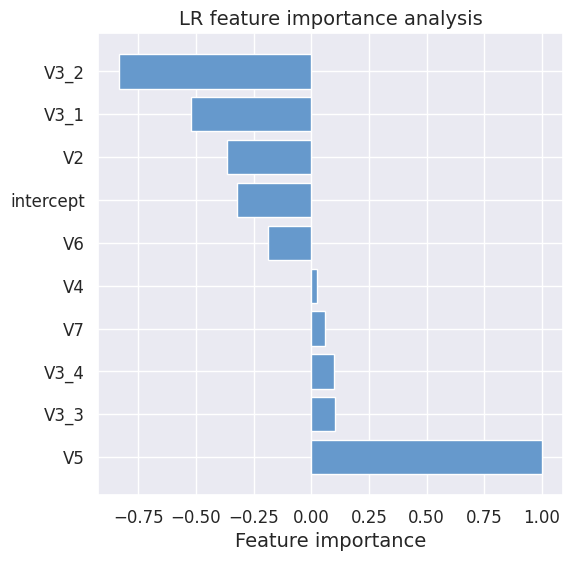

In [258]:
font = {'size': 7}
sns.set(font_scale=1.2)
plt.rc('font')
plt.figure(figsize=(6,6))
plt.barh(range(len(data_x)), data_hight, color='#6699CC')
plt.yticks(range(len(data_x)),data_x,fontsize=12)
plt.tick_params(labelsize=12)
plt.xlabel('Feature importance',fontsize=14)
plt.title("LR feature importance analysis",fontsize = 14)
plt.show()

---

## 8 绘制ROC曲线，计算AUC值

Text(0.5, 1.0, 'ROC Curve (Test Set)')

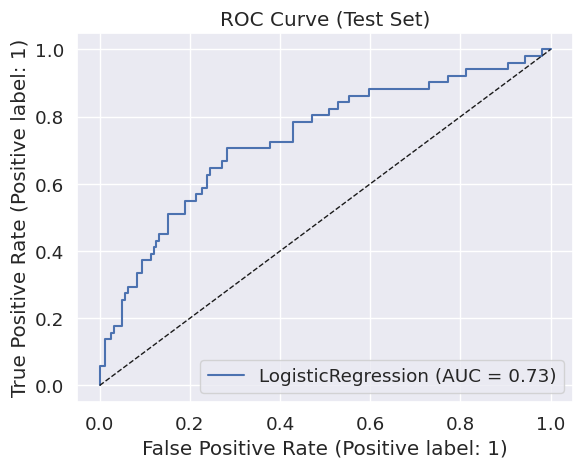

In [259]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth=1)
plt.title('ROC Curve (Test Set)')

---

## 9 计算科恩kappa得分

科恩kappa得分（Cohen's kappa score）是一种用于衡量两个评分者之间一致性的统计指标。它考虑了由于随机因素导致的一致性，比简单的准确率更能反映评分者之间的真实一致性。该指标的值范围在 -1 到 1 之间：
- -1 表示完全不一致。
- 0 表示一致性等同于随机猜测。
- 1 表示完全一致。

In [260]:
cohen_kappa_score(y_test, pred)

0.27361287590004235